In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [42]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [43]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [45]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [46]:
data.shape

(5110, 12)

In [47]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [48]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [49]:
data.dropna(inplace=True)

In [50]:
stroke_counts =data["stroke"].value_counts()
print(stroke_counts)

0    4700
1     209
Name: stroke, dtype: int64


In [51]:
data.groupby("stroke").mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,37042.892128,41.760451,0.083191,0.043191,104.003736,28.823064
1,37546.038278,67.712919,0.287081,0.191388,134.571388,30.471292


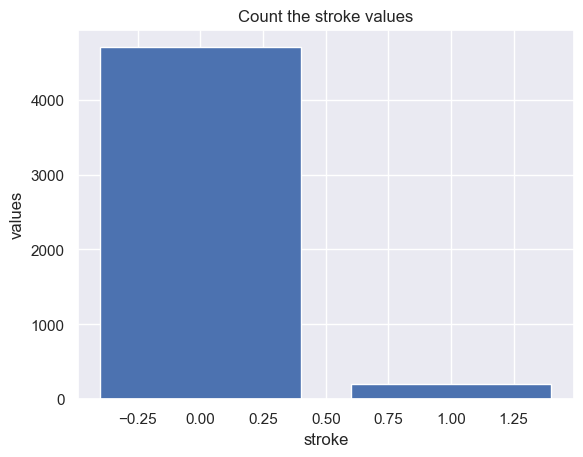

In [52]:
plt.bar(stroke_counts.index , stroke_counts.values)
plt.xlabel("stroke")
plt.ylabel("values")
plt.title("Count the stroke values")
plt.show()

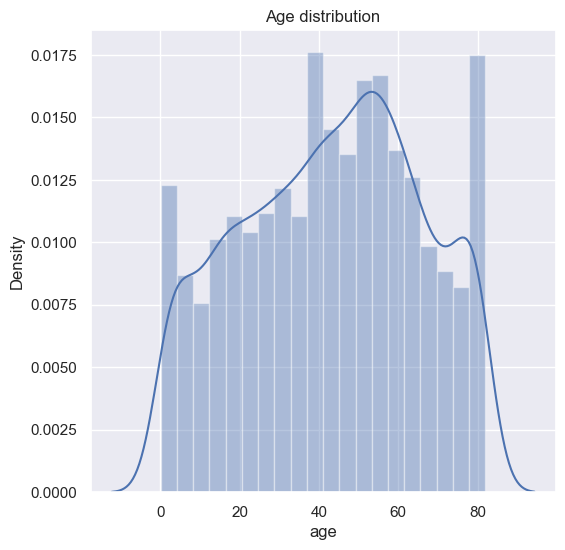

In [53]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data["age"])
plt.title("Age distribution")
plt.show()

In [54]:
avg_age =data["age"].value_counts().mean()
print(avg_age)

47.20192307692308


In [55]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [56]:
data.drop(columns="id",axis=1,inplace=True)

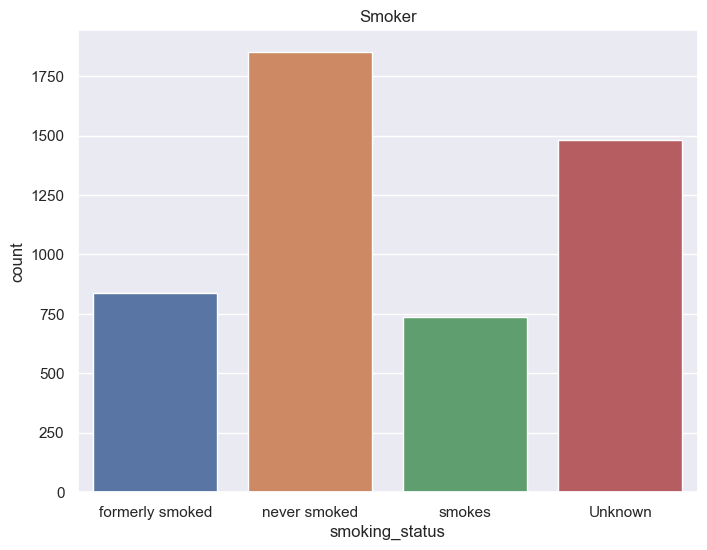

In [57]:
#smoker column
plt.figure(figsize=(8,6))
sns.countplot(x="smoking_status", data=data)
plt.title("Smoker")
plt.show()

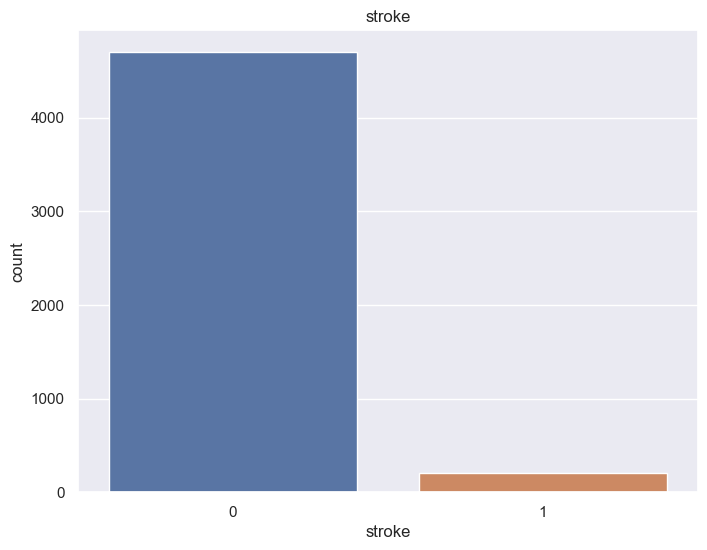

In [58]:
#smoker column
plt.figure(figsize=(8,6))
sns.countplot(x="stroke", data=data)
plt.title("stroke")
plt.show()

In [59]:
data["work_type"].value_counts()


Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

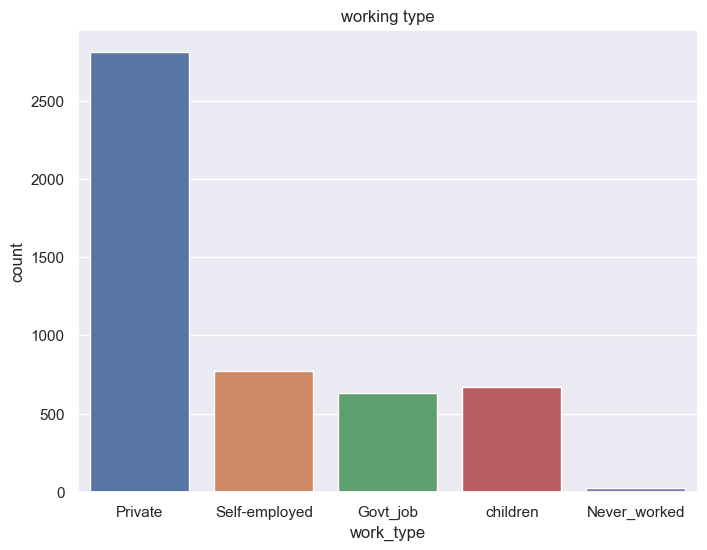

In [60]:
#smoker column
plt.figure(figsize=(8,6))
sns.countplot(x="work_type", data=data)
plt.title("working type")
plt.show()

### Heat map

<AxesSubplot:>

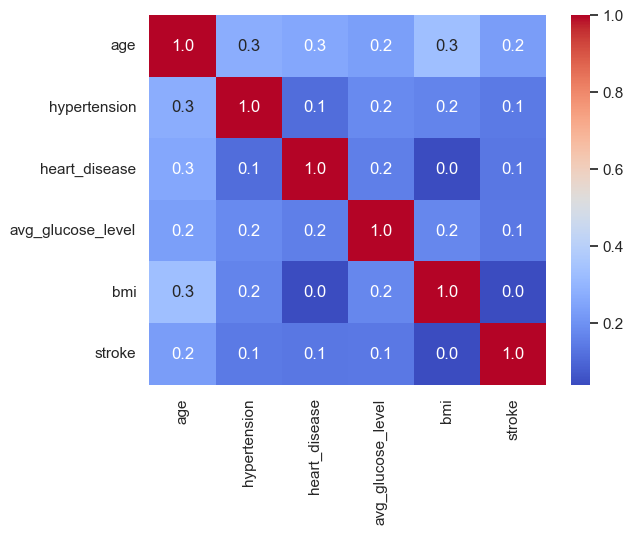

In [61]:
correlation =data.corr()
sns.heatmap(correlation,cbar=True,annot=True,fmt=".1f",cmap="coolwarm")

In [62]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [63]:
data["Residence_type"].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

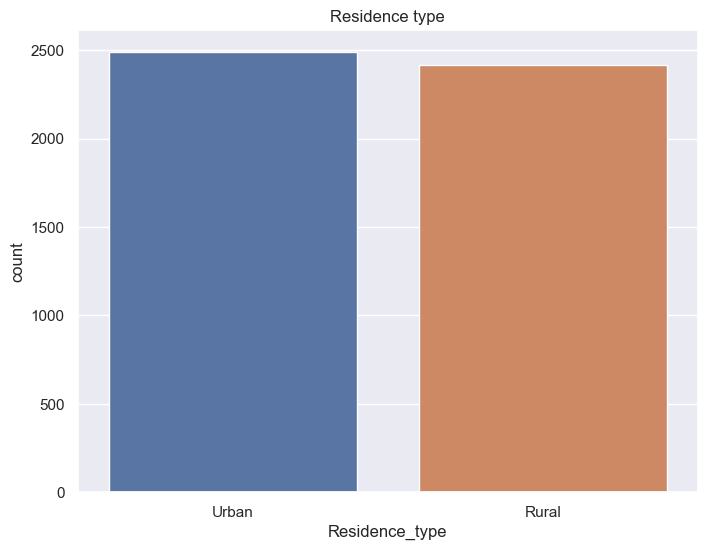

In [64]:

plt.figure(figsize=(8,6))
sns.countplot(x="Residence_type", data=data)
plt.title("Residence type")
plt.show()

In [65]:
data["heart_disease"].value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

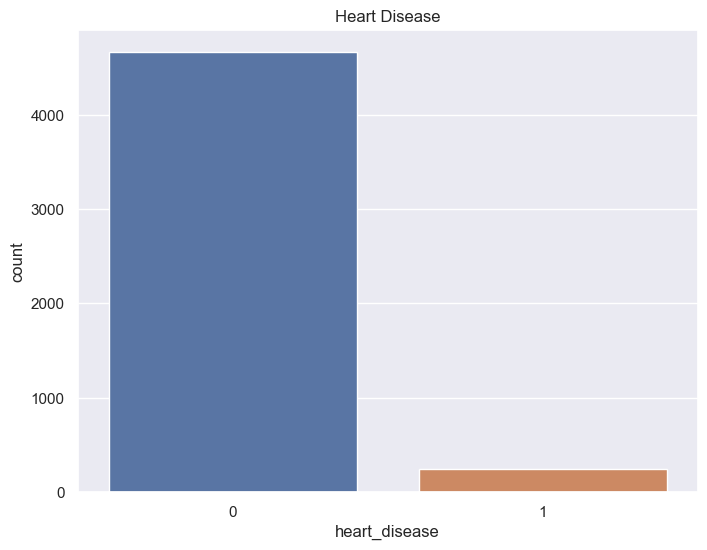

In [66]:
plt.figure(figsize=(8,6))
sns.countplot(x="heart_disease", data=data)
plt.title("Heart Disease")
plt.show()

In [67]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [68]:
data["gender"].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

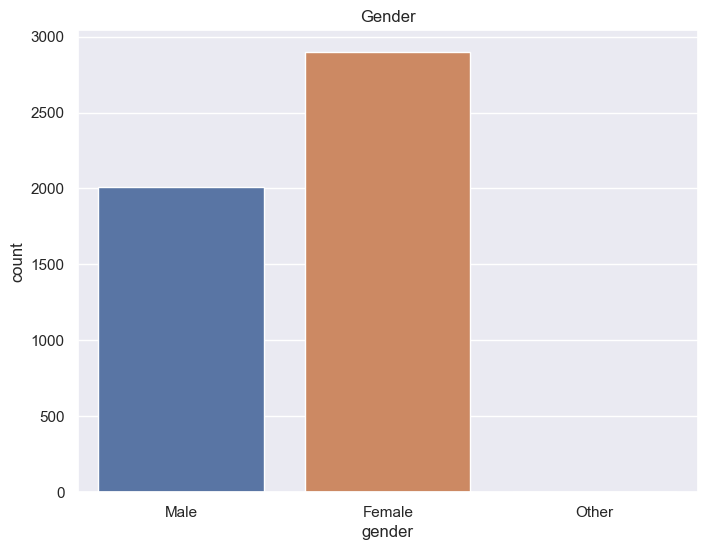

In [69]:
plt.figure(figsize=(8,6))
sns.countplot(x="gender", data=data)
plt.title("Gender")
plt.show()

### Label Encoding

In [70]:
encoder= LabelEncoder()

In [71]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [72]:
data["gender"] = encoder.fit_transform(data["gender"])
data["work_type"] = encoder.fit_transform(data["work_type"])
data["Residence_type"] = encoder.fit_transform(data["Residence_type"])
data["ever_married"] = encoder.fit_transform(data["ever_married"])
data["smoking_status"] = encoder.fit_transform(data["smoking_status"])

In [73]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### Split the data

In [74]:
X=data.drop(columns="stroke",axis=1)
Y = data["stroke"]

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [76]:
print(X.shape,X_train.shape,X_test.shape)

(4909, 10) (3927, 10) (982, 10)


### DecisionTreeClassifier

In [77]:
classifier = DecisionTreeClassifier()

In [78]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [79]:
y_pred = classifier.predict(X_test)

In [80]:
accuracy = accuracy_score(Y_test,y_pred)
print("The accuracy of test data is:", accuracy)

The accuracy of test data is: 0.9124236252545825


### MLP classifier


In [81]:
from sklearn.neural_network import MLPClassifier

In [82]:
mlp=MLPClassifier()

In [85]:
mlp.fit(X_train,Y_train)

y_pred_mlp = mlp.predict(X_test)

In [87]:
mlp.score(X_test,Y_test)

0.955193482688391

### RandomForestRegressor

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(n_estimators= 100)

In [94]:
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [95]:
y_pred_rfc = rfc.predict(X_test)

In [96]:
print(pd.crosstab(Y_test,y_pred_rfc))
print(classification_report(Y_test,y_pred_rfc))

col_0     0  1
stroke        
0       938  1
1        43  0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       939
           1       0.00      0.00      0.00        43

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.91      0.96      0.93       982



### Cross validating accuracies

In [98]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X_train,Y_train,cv = 20, scoring='accuracy').mean()

0.9190161089816635

In [99]:
cross_val_score(mlp,X_train,Y_train,cv = 20, scoring='accuracy').mean()

0.9569680410235157

In [101]:
cross_val_score(rfc,X_train,Y_train,cv = 20, scoring='accuracy').mean()

0.9564578369418832

## Predictive System

In [83]:
input_data = [1,67.0,0,1,1,2,1,228.69,36.6,1]
input_data_as_numpyarray = np.asarray(input_data)

#reshaped the input_data
reshape_input_data = input_data_as_numpyarray.reshape(1,-1)
prediction = classifier.predict(reshape_input_data)
print(prediction)
if (prediction[0]==0):
    print("The person is healthy")
else:
    print("The person is not healthy")

[1]
The person is not healthy


### Saving the trained model

In [93]:
import pickle

In [94]:
filename = "trained_model.sav"
pickle.dump(classifier , open(filename, "wb"))

### loading the save model

In [98]:
#loading the trained model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [99]:
input_data = [1,67.0,0,1,1,2,1,228.69,36.6,1]
input_data_as_numpyarray = np.asarray(input_data)

#reshaped the input_data
reshape_input_data = input_data_as_numpyarray.reshape(1,-1)
prediction = loaded_model.predict(reshape_input_data)
print(prediction)
if (prediction[0]==0):
    print("The person is healthy")
else:
    print("The person is not healthy")

[1]
The person is not healthy
